In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Python Module

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%matplotlib notebook
import sklearn
import skimage
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

import os
from skimage.transform import resize
import pylab


from scipy import ndimage, misc

import cv2
from imutils import paths

In [ ]:
# Setpath google drive and initial value

main_folder_path = "/content/drive/MyDrive/Ai/Raw_data/"
# main_folder_path = "/content/drive/MyDrive/Ai/Badpic/"
save_folder_path = "/content/drive/MyDrive/Ai/Clean_data/"
# save_folder_path = "/content/drive/MyDrive/Ai/Clean_Badpic/"
datatset_folder_path = "/content/drive/MyDrive/Ai/Dataset/"
# datatset_folder_path = "/content/drive/MyDrive/Ai/Bad_dataset/"
main_folder = os.listdir(main_folder_path)
save_folder = os.listdir(save_folder_path)
datatset_folder = os.listdir(datatset_folder_path)

labels_dict = {'Gluacoma':0, 'Non-Gluacoma':1, 'Normal':2, 'Abnormal':3, 'Others':4, 'Non-Others':5}

### **Preprocessing**

In [ ]:
# Preprocessing

sum = 0
i = 0
for sub_folder in main_folder:
    # gluacoma, normal, other
    print(sub_folder)
    list_folder = os.listdir(main_folder_path + sub_folder)
    for image_folder in list_folder:
      # subfolder in gluacoma , normal , others
      print(image_folder)
      list_image = os.listdir(main_folder_path + sub_folder +'/'+ image_folder)
      print(len(list_image))
      for image in list_image:
        # all image in subfolder
        # print(image)
        #***************************************#
        # Contour
        im = cv2.imread(main_folder_path + sub_folder +'/'+ image_folder +'/'+ image)
        im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        w_real, h_real, _ = np.array(im_rgb).shape
        # print(im)
        # Contour -> หาเส้นรอบวง
        im_gr = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY) # grayscale
        _, im_thr = cv2.threshold(im_gr,10,255,0)
        # หาเส้นเค้าโครง
        contour, _ = cv2.findContours(im_thr,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        # max contour คือเอาเฉพาะเส้นโค้งที่ใหญ่สุด
        max_contour = np.argmax([len(i) for i in contour])
        # con_t = cv2.drawContours(im_rgb,contour,max_contour, (0,200,0), 5)
        con = im_rgb
        x,y,w,h = cv2.boundingRect(contour[max_contour])
        # print(w,h)
        if w >= h :
          w_cat = w
          h_plus = w-h
          con = con[y:y+w, x:x+w]
          if w > w_real:
            img_plus = np.zeros([int(h_plus/2),w_cat,3],dtype=np.uint8)
            img_plus.fill(0)
            # print(con.shape, img_plus.shape)
            con = np.concatenate((img_plus[:None],con,img_plus[:None]),axis = 0) # 0 short edge, 1 long edge
        else :
          w_cat = h-w
          h_plus = h
          con = con[y:y+h, x:x+h]
        # Resize
        im_resized = cv2.resize(con, (224,224))
        #***************************************#
        name = sub_folder[0]
        cv2.imwrite(f"/content/drive/MyDrive/Ai/Clean_data/{sub_folder}/{name}_{i}.png", cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        # cv2.imwrite(f"/content/drive/MyDrive/Ai/Clean_Badpic/{sub_folder}/{sub_folder}_{i}.png", cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
        # print("Image Resized Saved")
        i += 1
        sum += 1
      print(sum)
      sum = 0

Normal
UniOfErlangen-Nuremberg
15
15
Kaggle
38
38
Orange-IEEE-Dataport
188
188
ORIGA
482
482
Others
Hypertension
62
62
Myopia
136
136
Other
145
145
Diabetes
187
187
Age
174
174
Gluacoma
Technische_Fakultat
15
15
BinRushed2
47
47
BinRushed3
47
47
BinRushed1
50
50
MagrabiaFemale
47
47
ORIGA
168
168
BinRushed4
51
51
MagrabiaMale
47
47
MessidorPrime
460
460


### **Check Result**

In [ ]:
# Check จำนวนรูปในแต่ละคลาสของ Rawdata

sum = 0
for sub_folder in main_folder:
    # print(sub_folder)
    # gluacoma, normal, other
    list_folder = os.listdir(main_folder_path + sub_folder)
    for image_folder in list_folder:
      # print(image_folder)
      # subfolder in gluacoma , normal , others
      list_image = os.listdir(main_folder_path + sub_folder +'/'+ image_folder)
      print(f"{sub_folder}/{image_folder}",len(list_image))
      sum += len(list_image)
    print('Total '+ str(sum))
    sum = 0

Normal/UniOfErlangen-Nuremberg 15
Normal/Kaggle 38
Normal/Orange-IEEE-Dataport 188
Normal/ORIGA 482
Total 723
Others/Hypertension 62
Others/Myopia 136
Others/Other 145
Others/Diabetes 187
Others/Age 174
Total 704
Gluacoma/Technische_Fakultat 15
Gluacoma/BinRushed2 47
Gluacoma/BinRushed3 47
Gluacoma/BinRushed1 50
Gluacoma/MagrabiaFemale 47
Gluacoma/ORIGA 168
Gluacoma/BinRushed4 51
Gluacoma/MagrabiaMale 47
Gluacoma/MessidorPrime 460
Total 932


In [ ]:
# Check จำนวนรูปในแต่ละคลาสหลังจาก Preprocessing

for sub_folder in save_folder:
    # gluacoma, normal, other
    print(sub_folder)
    list_image = os.listdir(save_folder_path + sub_folder)
    for image in list_image:
      # image name
      sum += 1
    print('Total '+ sub_folder + ' ' + str(sum))
    sum = 0

Gluacoma


TypeError: ignored

### **Test Preprocessing**

In [ ]:
# Set ที่อยู่ของแต่ละ Class
## Show จำนวนรูป

# ORIGA only
glucoma_folder = os.listdir('/content/drive/MyDrive/Ai/Raw_data/Gluacoma/ORIGA/')
print('Gluacoma')
print(len(glucoma_folder))

# Kaggle only
normal_folder = os.listdir('/content/drive/MyDrive/Ai/Raw_data/Normal/Normal-ACRIMA database/')
print('Normal')
print(len(normal_folder))

# Age only
others_folder = os.listdir('/content/drive/MyDrive/Ai/Raw_data/Others/Age/')
print('Others')
print(len(others_folder))

Gluacoma
168
Normal
260
Others
174


Im001_ACRIMA.jpg
1
349 349
(224, 224, 3)


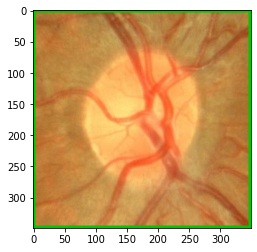

In [ ]:
# Preprocess Testing
## Resize 1 image

%matplotlib inline 
for i, img in enumerate(normal_folder):
  if i == 0:
    print(img)
    im = cv2.imread(f"/content/drive/MyDrive/Ai/Raw_data/Normal/Normal-ACRIMA database/{img}")
    im_rgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    green_image = im_rgb.copy()
    green_image[:,:,0] = 0
    green_image[:,:,2] = 0
    # red_image = im_rgb.copy()
    # red_image[:,:,1] = 0
    # red_image[:,:,2] = 0
    w_real, h_real, _ = np.array(im_rgb).shape
    # print(im)
    # Contour -> หาเส้นรอบวง
    im_gr = cv2.cvtColor(green_image,cv2.COLOR_BGR2GRAY) # grayscale
    # im_gr = cv2.cvtColor(im_gr,cv2.COLOR_GRAY2RGB)
    # print(im_gr)
    # cv2.imwrite(f"/content/drive/MyDrive/Ai/{img[:-4]}.png", cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
    _, im_thr = cv2.threshold(im_gr,10,255,cv2.THRESH_BINARY)
    # _, im_thr = cv2.threshold(im_gr,127,255,cv2.THRESH_BINARY)
    # หาเส้นเค้าโครง
    # circles = cv2.HoughCircles(im_gr, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    # circles = np.uint16(np.around(circles))
    # for i in circles[0,:]:
    #   # draw the outer circle
    #   cv2.circle(im_rgb,(i[0],i[1]),i[2],(0,255,0),2)
    contour, _ = cv2.findContours(im_thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    print(len(contour))
    # for i in range(len(contour)):
    #   con_t = cv2.drawContours(im_rgb,contour,i, (0,200,0), 5)
    max_contour = np.argmax([len(i) for i in contour])
    con_t = cv2.drawContours(im_rgb,contour,max_contour, (0,200,0), 5)

    x,y,w,h = cv2.boundingRect(contour[max_contour])
    print(w,h)
    if w >= h :
      w_cat = w
      h_plus = w-h
      con = con_t[y:y+w, x:x+w]
      if w > w_real:
        img_plus = np.zeros([int(h_plus/2),w_cat,3],dtype=np.uint8)
        img_plus.fill(0)
        print(con.shape, img_plus.shape)
        con = np.concatenate((img_plus[:None],con,img_plus[:None]),axis = 0) #0 short edge, 1 long edge
    else :
      w_cat = h-w
      h_plus = h
      con = con_t[y:y+h, x:x+h]
    im_resized = cv2.resize(con, (224,224))
    print(im_resized.shape)
    plt.imshow(con)